# Financial Fraud Detection: Data Analysis & Machine Learning

This notebook performs Exploratory Data Analysis (EDA), feature engineering, and trains a fraud detection model using logistic regression.

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set(style = 'whitegrid')

In [2]:
# Load the Dataset
df = pd.read_csv("Fraud Detection Dataset.csv")

In [3]:
# Display basic dataset information
df.head() # First few rows

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.info() # Data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.shape    # Dataset dimensions

(6362620, 11)

In [6]:
df.isnull().sum() # Checking missing values

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
# Checking fraud distribution
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [8]:
df["isFlaggedFraud"].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [9]:
# Calculate fraud percentage
fraud_per = round((df["isFraud"].value_counts()[1] / df.shape[0]) * 100,2)
print("The fraud percentage is", fraud_per)

The fraud percentage is 0.13


## Exploratory Data Analysis (EDA)

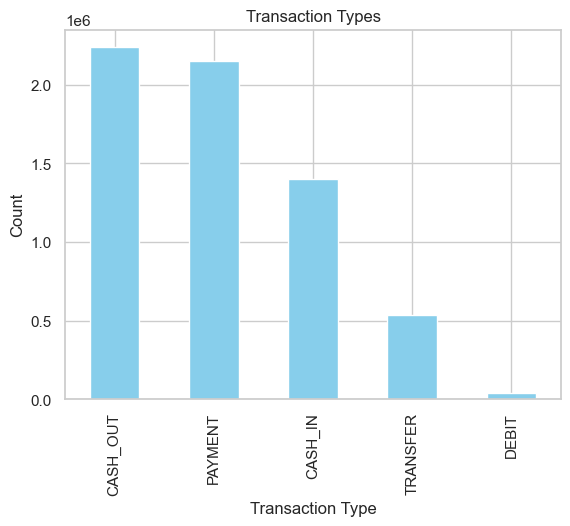

In [10]:
# 1. Transaction Types Distribution
df["type"].value_counts().plot(kind="bar", 
                               title="Transaction Types",
                               color = "skyblue")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()

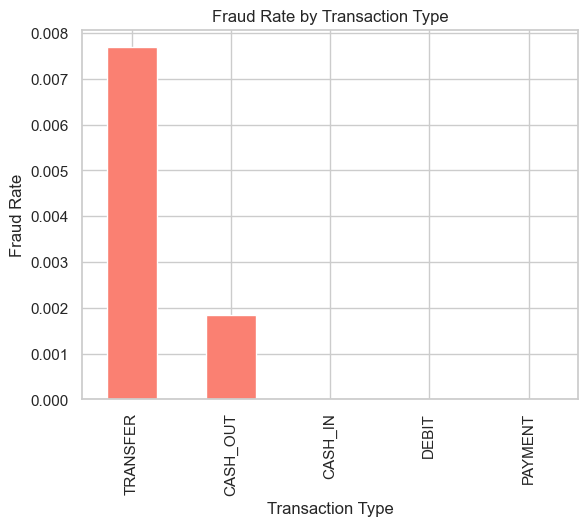

In [11]:
# 2. Fraud Rate by Transaction Type
fraud_by_type = df.groupby("type")["isFraud"].mean().sort_values(ascending=False)
fraud_by_type.plot(kind="bar",
                   title = "Fraud Rate by Transaction Type",
                   color = "Salmon")
plt.xlabel("Transaction Type")
plt.ylabel("Fraud Rate")
plt.show()

In [12]:
# 3. Transaction Amount Distribution (log scale)
df["amount"].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int32

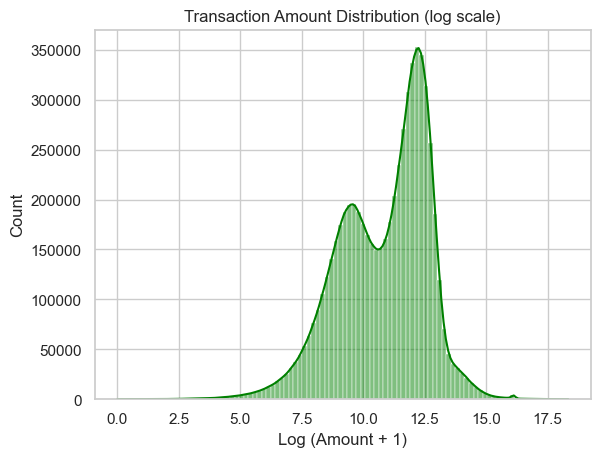

In [13]:
sns.histplot(np.log1p(df["amount"]), 
             bins = 100, 
             kde = True, 
             color = "Green")

plt.title("Transaction Amount Distribution (log scale)")
plt.xlabel("Log (Amount + 1)")
plt.show()

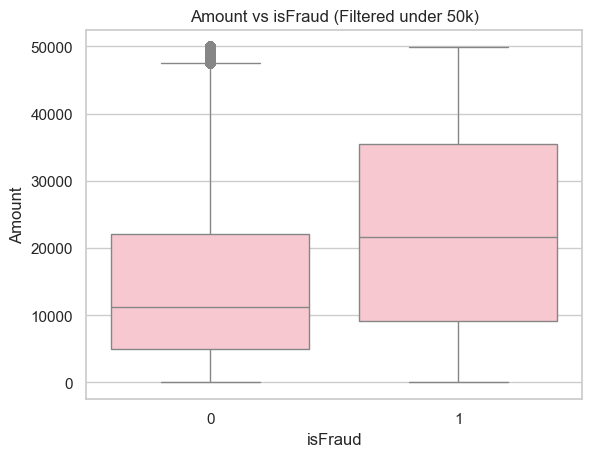

In [14]:
# 4. Fraud vs Transaction Amount Relationship
sns.boxplot(data = df[df["amount"] < 50000], x = "isFraud", y = "amount", color = "pink")
plt.title("Amount vs isFraud (Filtered under 50k)")
plt.ylabel("Amount")
plt.show()

In [15]:
# 5. Balance Changes and Anomolies
df["balanceDiffOrig"] = df["oldbalanceOrg"] - df["newbalanceOrig"]
df["balanceDiffDest"] = df["newbalanceDest"] - df["oldbalanceDest"]

In [16]:
# Checking transactions where balance difference is negative
print("Negative Balance Changes in Sender:", (df["balanceDiffOrig"] < 0).sum())
print("Negative Balance Changes in Receiver:", (df["balanceDiffDest"] < 0).sum())

Negative Balance Changes in Sender: 1399253
Negative Balance Changes in Receiver: 1238864


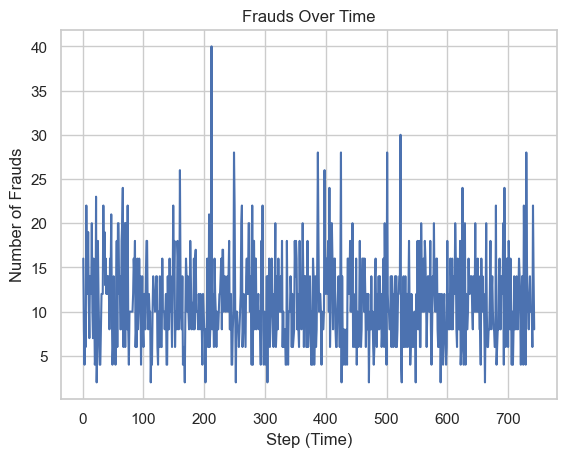

In [17]:
# 6. Fraud Trends Over Time (Steps)
frauds_per_step = df[df["isFraud"] == 1]["step"].value_counts().sort_index()
plt.plot(frauds_per_step.index, frauds_per_step.values, label = "Frauds per Step")
plt.title("Frauds Over Time")
plt.xlabel("Step (Time)")
plt.ylabel("Number of Frauds")
plt.grid(True)
plt.show()

## User Insights

In [ ]:
# 1. Top 10 Most Frequent Senders
top_senders = df["nameOrig"].value_counts().head(10)
print(top_senders)

nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
C1677795071    3
C1462946854    3
C1999539787    3
C2098525306    3
C400299098     3
Name: count, dtype: int64


In [ ]:
# 2. Top 10 Most Frequent Receivers
top_receivers = df["nameDest"].value_counts().head(10)
print(top_receivers)

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C451111351      99
C1789550256     99
C1360767589     98
C1023714065     97
Name: count, dtype: int64


In [ ]:
# 3. Top 10 Fraudulent Users (Senders)
fraud_users = df[df["isFraud"] == 1]["nameOrig"].value_counts().head(10)
print(fraud_users)

nameOrig
C1305486145    1
C755286039     1
C973279667     1
C258213312     1
C1640703547    1
C1127265876    1
C317779855     1
C1064034527    1
C1141104763    1
C1966863341    1
Name: count, dtype: int64


## Fraud Distribution & Correlation Analysis

In [21]:
# 1. Fraud Distribution in TRANSFER & CASH_OUT
fraud_types = df[df["type"].isin(["TRANSFER", "CASH_OUT"])]
fraud_types

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0,181.00,0.00
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0,181.00,-21182.00
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.00,51513.44,0,0,15325.00,46430.44
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0,705.00,-22425.00
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0,10835.00,2712905.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0,339682.13,339682.13
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0,6311409.28,0.00
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0,6311409.28,6311409.27
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0,850002.52,0.00


In [22]:
fraud_types["type"].value_counts()

type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

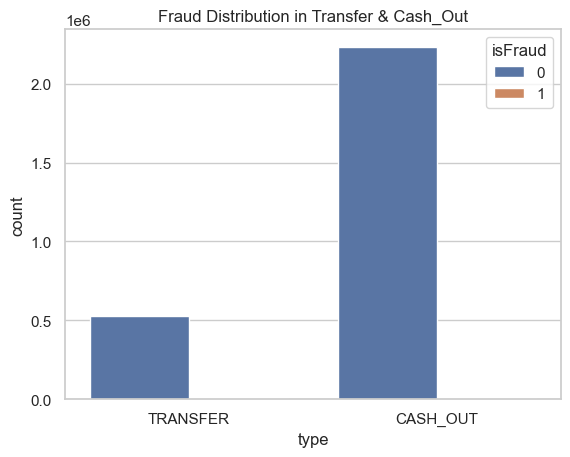

In [23]:
sns.countplot(data=fraud_types, x = "type", hue = "isFraud")
plt.title("Fraud Distribution in Transfer & Cash_Out")
plt.show()

In [24]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'balanceDiffOrig', 'balanceDiffDest'],
      dtype='object')

In [25]:
# 2. Correlation Matrix
corr = df[["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest","isFraud"]].corr()
print(corr)

                  amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
amount          1.000000      -0.002762       -0.007861        0.294137   
oldbalanceOrg  -0.002762       1.000000        0.998803        0.066243   
newbalanceOrig -0.007861       0.998803        1.000000        0.067812   
oldbalanceDest  0.294137       0.066243        0.067812        1.000000   
newbalanceDest  0.459304       0.042029        0.041837        0.976569   
isFraud         0.076688       0.010154       -0.008148       -0.005885   

                newbalanceDest   isFraud  
amount                0.459304  0.076688  
oldbalanceOrg         0.042029  0.010154  
newbalanceOrig        0.041837 -0.008148  
oldbalanceDest        0.976569 -0.005885  
newbalanceDest        1.000000  0.000535  
isFraud               0.000535  1.000000  


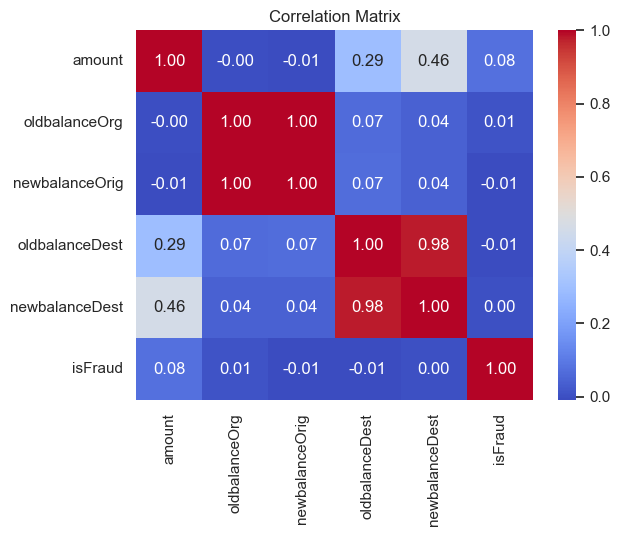

In [26]:
sns.heatmap(corr,annot = True, cmap = "coolwarm", fmt = ".2f")
plt.title("Correlation Matrix")
plt.show()

## Feature Engineering & Machine Learning

In [27]:
# import important sci-kit learn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [28]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0,9839.64,0.00
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0,1864.28,0.00
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0,181.00,0.00
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0,181.00,-21182.00
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0,11668.14,0.00
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0,7817.71,0.00
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0,7107.77,0.00
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0,7861.64,0.00
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0,2671.00,0.00
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0,5337.77,-1549.21


In [29]:
# Remove Unnecessary Features
df_model = df.drop(["step","nameOrig","nameDest","isFlaggedFraud"], axis = 1)

In [30]:
df_model.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,181.00,-21182.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14,0.0


In [31]:
# Define feature categories
categorical = ["type"]
numeric = ["amount", "oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]

In [32]:
# Splitting dataset into features (X) and target (y)
y = df_model["isFraud"]
X = df_model.drop("isFraud", axis = 1)

In [33]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y)

In [34]:
# Preprocessing with Scaling & One-Hot Encoding
preprocessor = ColumnTransformer(
    transformers= [
        ("num", StandardScaler(), numeric),
        ("cat", OneHotEncoder(drop = "first"), categorical)
    ],
    remainder= "drop"
)

In [35]:
# Logistic Regression Model (Balanced Class Weights)
pipeline = Pipeline([
    ("prep", preprocessor),
    ("clf", LogisticRegression(class_weight = "balanced", max_iter = 1000))
])

In [36]:
# Train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [42]:
# Model Predictions & Evaluation
y_pred = pipeline.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 1]


In [38]:
print("Classification Report:\n",classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97   1906322
           1       0.02      0.94      0.04      2464

    accuracy                           0.95   1908786
   macro avg       0.51      0.95      0.51   1908786
weighted avg       1.00      0.95      0.97   1908786



In [39]:
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[1805926  100396]
 [    138    2326]]


In [40]:
# Calculate model accuracy
accuracy = pipeline.score(X_test, y_test) * 100
print(f"Model Accuracy: {accuracy:.2f}%")

Model Accuracy: 94.73%


## Exporting the Model for Deployment

In [43]:
import joblib

# Save trained pipeline for later use in Streamlit
joblib.dump(pipeline, "fraud_detection_pipeline.pkl")
print("Model saved successfully!")

Model saved successfully!
